In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns

In [2]:
with open("../eval_results/perplexity/ppl_scaled_lang_neurons.json") as f:
    data1 = json.load(f)

with open("../eval_results/perplexity/ppl_scaled_base.json") as f:
    data2 = json.load(f)

In [3]:
data = {lang:{} for lang in data1}

langs = ["en", "fr", "es", "vi", "id", "zh", "ru", "uk", "hi"] 

for lang in langs:
    data[lang]["hf 16"] = data2[lang]["hf 16"]
    data[lang]["rtn 4"] = data2[lang]["rtn 4"]
    data[lang]["awq 4"] = data2[lang]["awq 4"]

for lang in langs:
    data[lang]["twq 4 ln"] = data1[lang]["twq 4 ln"]
    data[lang]["twq 4 rng"] = data1[lang]["twq 4 random"]

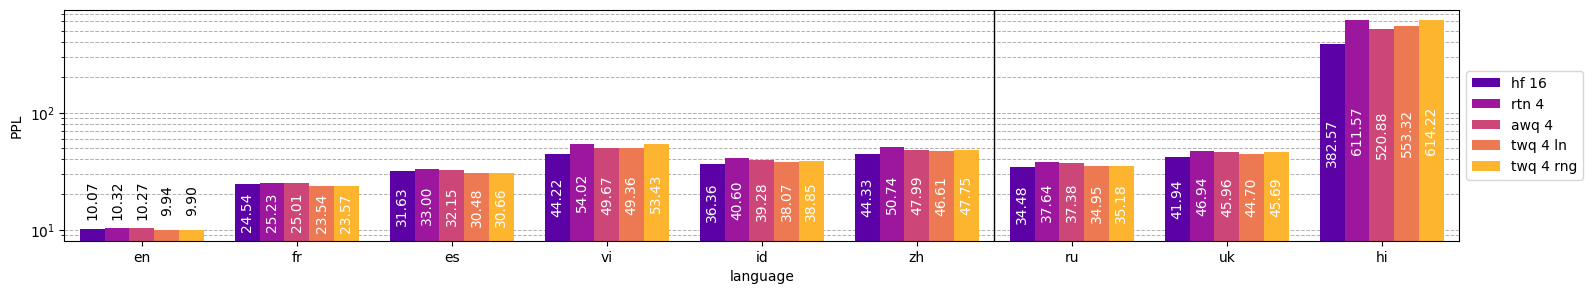

In [4]:
df = []
for n, lang in enumerate(data):
    for quant in data[lang]:
        df.append([lang, quant, data[lang][quant]["perplexity"]])
df = pd.DataFrame(df, columns=["language", "quant", "PPL"])

plt.figure(figsize=(18, 3), dpi=100)

ax = sns.barplot(x="language", y="PPL", hue="quant", palette="plasma", data=df, saturation=1)
for container in ax.containers:
    labels = ax.bar_label(container, label_type="center", color="white", padding=0, fmt='%.2f')
    for n, label in enumerate(labels):
        if n == 0:
            label.set_color("black")
            label.set_position([0.5, 25])
        label.set_rotation(90)
plt.yscale("log")
# ax.set_ylim(0, 12)
plt.axvline(x=5.5, color='black', linestyle='-', linewidth=1)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(axis="y", which="both", zorder=-10000, linewidth=0.7, linestyle="--")
ax.set_axisbelow(True)
plt.show()

In [5]:
# Based on the tokenized length of the concatenated FLORES sequences
raw_text_sizes = [31738, 45407, 51274, 60545, 45268, 53536, 88465, 54432, 137103]
text_sizes = [t / raw_text_sizes[0] for t in raw_text_sizes]
text_sizes

[1.0,
 1.4306824626630537,
 1.6155397315520827,
 1.9076501354842774,
 1.4263028546222194,
 1.6868107631230702,
 2.787352700233159,
 1.7150419056021173,
 4.319837418866974]

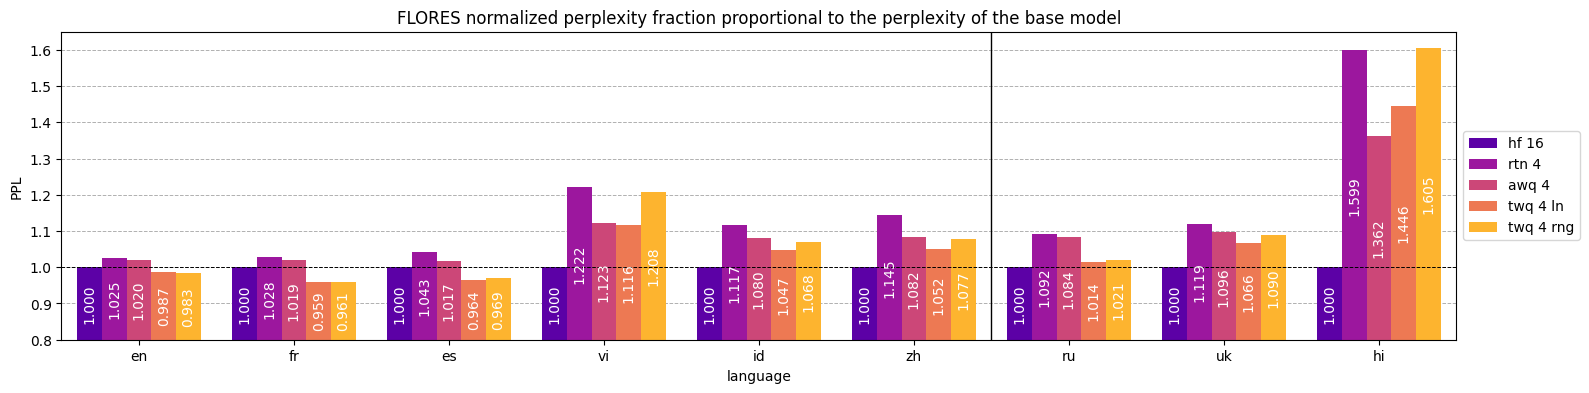

In [6]:
df = []
for n, lang in enumerate(data):
    for quant in data[lang]:
        df.append([lang, quant, data[lang][quant]["perplexity"]/data[lang]["hf 16"]["perplexity"]])
df = pd.DataFrame(df, columns=["language", "quant", "PPL"])

plt.figure(figsize=(18, 4), dpi=100)

plt.title("FLORES normalized perplexity fraction proportional to the perplexity of the base model")

ax = sns.barplot(x="language", y="PPL", hue="quant", palette="plasma", data=df, saturation=1)
for container in ax.containers:
    labels = ax.bar_label(container, label_type="center", color="white", padding=0, fmt='%.3f')
    for label in labels:
        label.set_rotation(90)
# plt.yscale("log")
ax.set_ylim(0.8, 1.65)
ax.axhline(1, color='black', linestyle='--', linewidth=0.7)
plt.axvline(x=5.5, color='black', linestyle='-', linewidth=1)


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(axis="y", which="both", zorder=-10000, linewidth=0.7, linestyle="--")
ax.set_axisbelow(True)
plt.show()

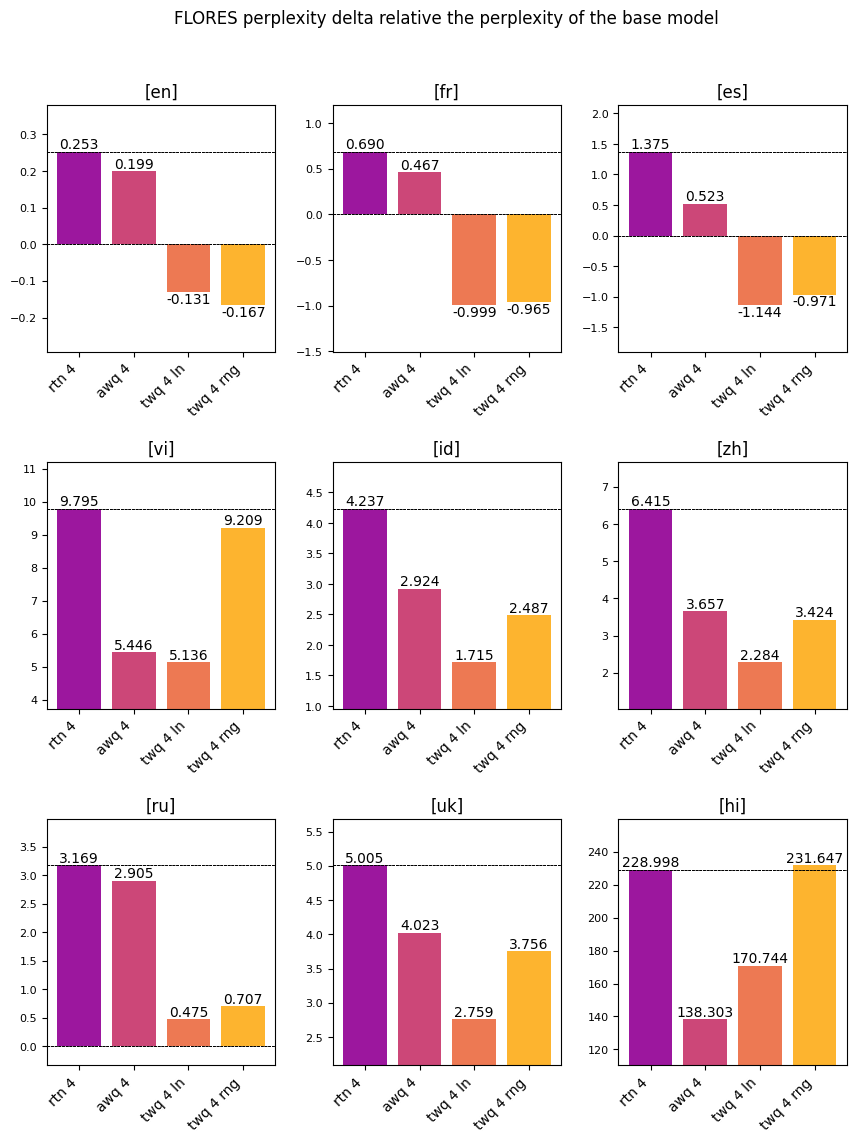

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(10, 12), dpi=100)
axes = axes.reshape(-1)
fig.suptitle("FLORES perplexity delta relative the perplexity of the base model")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.25, hspace=0.45)

for n, lang in enumerate(data.keys()):
    cmap = plt.get_cmap('plasma')
    axes[n].set_title(f"[{lang}]")

    ref = data[lang]["rtn 4"]["perplexity"]-data[lang]["hf 16"]["perplexity"]
    res = [data[lang][method]["perplexity"]-data[lang]["hf 16"]["perplexity"] for method in data[lang]][1:]

    lo = min(res)
    hi = max(res)

    axes[n].set_ylim(lo-(hi-lo)*0.3, hi+(hi-lo)*0.3)
    axes[n].tick_params(axis='y', which='both', labelsize=8)

    for m, method in enumerate(list(data[lang].keys())[1:]):
        axes[n].axhline(ref, color='black', linestyle='--', linewidth=0.5)
        axes[n].axhline(0, color='black', linestyle='--', linewidth=0.5)

        col = cmap((m+2)/(len(data[lang].keys())+1))
        br = axes[n].bar(method, res[m], color=col)
        axes[n].bar_label(br, fmt='%.3f')
    axes[n].set_xticks(axes[n].get_xticks(), axes[n].get_xticklabels(), rotation=45, ha='right')



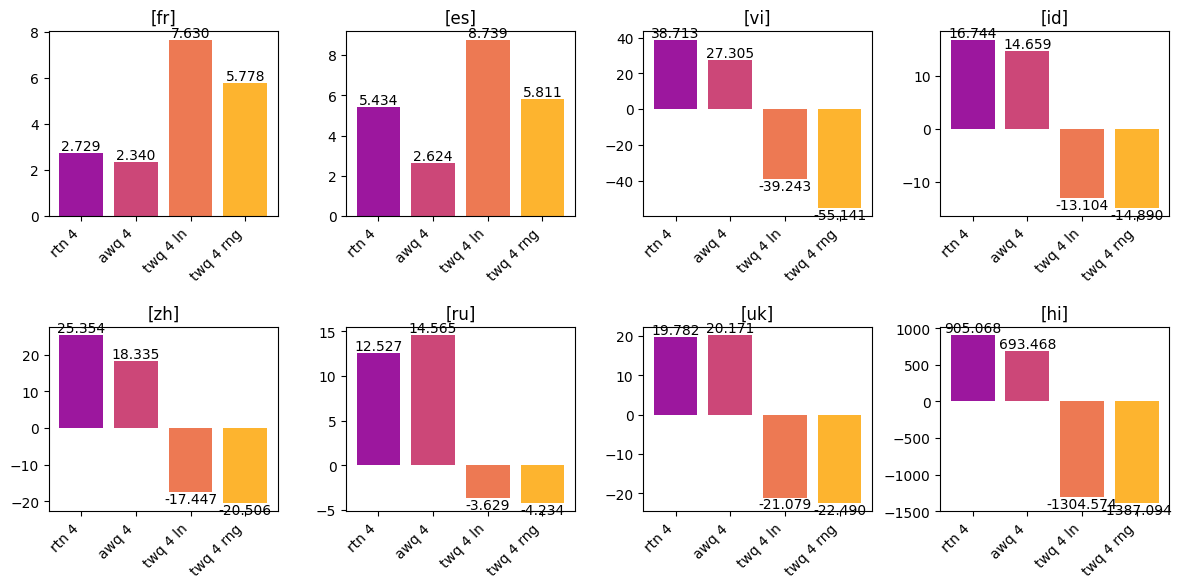

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(14, 6), dpi=100)
axes = axes.reshape(-1)
# fig.suptitle("FLORES perplexity delta proportional to the [en] perplexity delta")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.6)
for n, lang in enumerate(list(data.keys())[1:]):
    cmap = plt.get_cmap('plasma')
    # axes[n].set_ylim(0, 6.3)
    axes[n].set_title(f"[{lang}]")

    res = [(data[lang][method]["perplexity"]-data[lang]["hf 16"]["perplexity"])
        /(data["en"][method]["perplexity"]-data["en"]["hf 16"]["perplexity"]) for method in list(data[lang])[1:]]
    
    for m, method in enumerate(list(data[lang].keys())[1:]):
        lo = min(res[1:])
        hi = max(res)

        # axes[n].set_ylim(lo-(hi-lo)*0.3, hi+(hi-lo)*0.3)

        col = cmap((m+2)/(len(data[lang].keys())+1))
        br = axes[n].bar(method, res[m], color=col)
        axes[n].bar_label(br, fmt='%.3f')
    axes[n].set_xticks(axes[n].get_xticks(), axes[n].get_xticklabels(), rotation=45, ha='right')
    